<a href="https://colab.research.google.com/github/DedigamuwaNuwan/DedigamuwaNuwan.github.io/blob/main/E_18_063_ME421_Vibration_Activity_Oct_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TecQuipment - Vibration Analyser

Consider the TecQuipment vibration analyser setup where one end of a rigid beam is pinned and the other end is connected to the frame through a spring while an unbalnced motor is attached to the middle section of the beam.

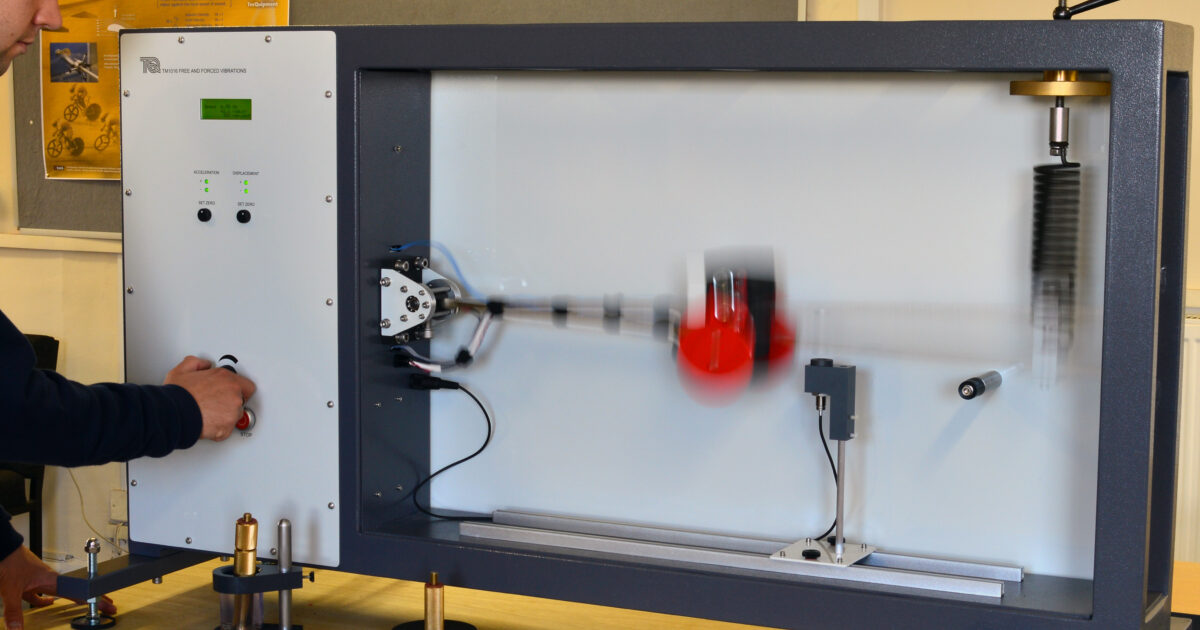

https://youtu.be/r_ouYEYhR5U

#Resources

https://github.com/mugalan/vibration-analysis

#Week #1

##Activity #1

Derive the 1-dof freedom model for describing the small amplitude motion of the system.

\begin{equation}
I_A \ddot{\theta} + c l_{damper}^2 \dot{\theta} + k l_{spring}^2 \theta = l_{mass} Q \sin{\Omega t}
\end{equation}

\begin{equation}
Q = \Omega^2 m_{\text{offsetmass}} r_{\text{offsetmass}}
\end{equation}

\begin{equation}
\ddot{\theta} + \frac{c \, l_{\text{damper}}^2}{I_A} \dot{\theta} + \frac{k \, l_{\text{spring}}^2}{I_A} \theta = \frac{l_{\text{exciter}} Q}{I_A} \sin(\Omega t)
\end{equation}

\begin{equation}
\ddot{\theta} + 2\gamma \dot{\theta} + \omega^2 \theta = q \sin(\Omega t)
\end{equation}

Where,

\begin{align}
q &= \frac{l_{\text{exciter}} Q}{I_A} \\
\gamma &= \frac{c \, l_{\text{damper}}^2}{2I_A} \\
\omega &= \sqrt{\frac{k \, l_{\text{spring}}^2}{I_A}}
\end{align}

One solution is,

\begin{equation}
\theta = M \cos(\Omega t) + N \sin(\Omega t)
\end{equation}

Introducing the magnification factor:

\begin{equation}
\theta = \frac{q}{\omega^2} \beta \sin(\Omega t - \phi)
\end{equation}

Where,

\begin{equation}
\beta = \frac{1}{\sqrt{1 - \left(\frac{\Omega^2}{\omega^2}\right)^2 + \left(\frac{2\zeta \Omega}{\omega}\right)^2}}
\end{equation}

So that,

\begin{equation}
\tan(\phi) = \frac{2\zeta \Omega/\omega}{1 - \frac{\Omega^2}{\omega^2}}
\end{equation}





##Activity #2

Estimate the damped natural frequency, $\omega_d$, and the amplitude of reseonance, $x_{ss_{max}}$, for small amplitude vibrations.

\begin{equation}
r^2 + 2 \gamma r + \omega^2 = 0
\end{equation}

\begin{equation}
r = -\gamma \ \pm \ \sqrt{\gamma^2 - \omega^2}
\end{equation}

At this point, there are three cases:
1. Underdamped, where  $\gamma < \omega$ gives two complex roots.
2. Critically damped, where $\gamma = \omega$ gives a single root.
3. Overdamped, where $\gamma > \omega$ gives two real roots.

When $\gamma < \omega$ we define the two root constants;

\begin{align}
r_1 & = -\gamma \ + \ i\omega_d\\
r_2 & = -\gamma \ - \ i\omega_d
\end{align}

Adding these into the general solution, $\ \theta = C e^{rt}$

\begin{equation}
\theta = A e^{-\gamma t} \cos (\sqrt{(\omega^2 - \gamma^2)}\ t-\alpha_d)
\end{equation}

Where $A$ and $\alpha_d$ are amplitude and phase based on initial conditions



\begin{equation}
\sqrt{\omega ^2 - \gamma ^{2}}\tau _{d} = 2\Pi  = \frac{2\Pi}{\omega _{d}}\end{equation}

\begin{equation}\omega _{d}^{2} = \omega ^2-\gamma ^{2}\end{equation}

\begin{equation}\frac{\omega _{d}}{\omega} = \sqrt{1-\zeta ^{2}}\end{equation}



##Activity #3

Plot the following:

* the unforced repsonse to an initiail diplacement of the spring end of the beam
* the forced response for three choices of the rotational speed of the motor
* theoretical frequency response of the system

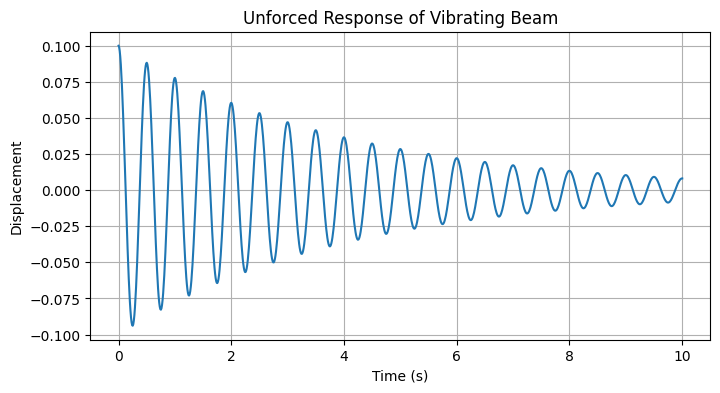

In [4]:
import numpy as np
import matplotlib.pyplot as plt

natural_frequency =2.0
damping_ratio = 0.01
time = np.linspace(0, 10, 1000)
initial_displacement = 0.1

omega_n = 2 * np.pi * natural_frequency
damping_coefficient = 2 * damping_ratio * omega_n
unforced_response = initial_displacement * np.exp(-damping_coefficient * time) * np.cos(omega_n * time)

plt.figure(figsize=(8, 4))
plt.plot(time, unforced_response)
plt.xlabel('Time (s)')
plt.ylabel('Displacement')
plt.title('Unforced Response of Vibrating Beam')
plt.grid(True)
plt.show()



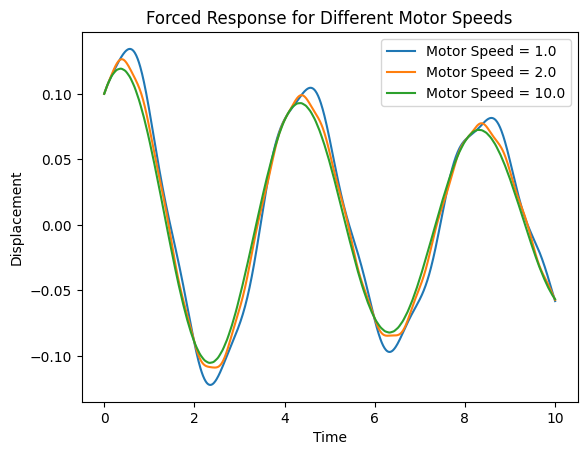

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

mass = 4.0
stiffness = 10.0
damping = 0.5
motor_speeds = [1.0, 2.0, 10.0]

t = np.linspace(0, 10, 1000)
def excitation_force(t, motor_speed):
    frequency = motor_speed
    return np.sin(2 * np.pi * frequency * t)

def forced_response(y, t, motor_speed):
    displacement, velocity = y
    displacement_dot = velocity
    velocity_dot = (-damping * velocity - stiffness * displacement + excitation_force(t, motor_speed)) / mass
    return [displacement_dot, velocity_dot]

initial_displacement = 0.1
initial_velocity = 0.1

# Plot the forced response for each motor speed
plt.figure()

for motor_speed in motor_speeds:
    solution = odeint(forced_response, [initial_displacement, initial_velocity], t, args=(motor_speed,))
    displacement = solution[:, 0]
    plt.plot(t, displacement, label=f'Motor Speed = {motor_speed}')

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Forced Response for Different Motor Speeds')
plt.legend()

plt.show()



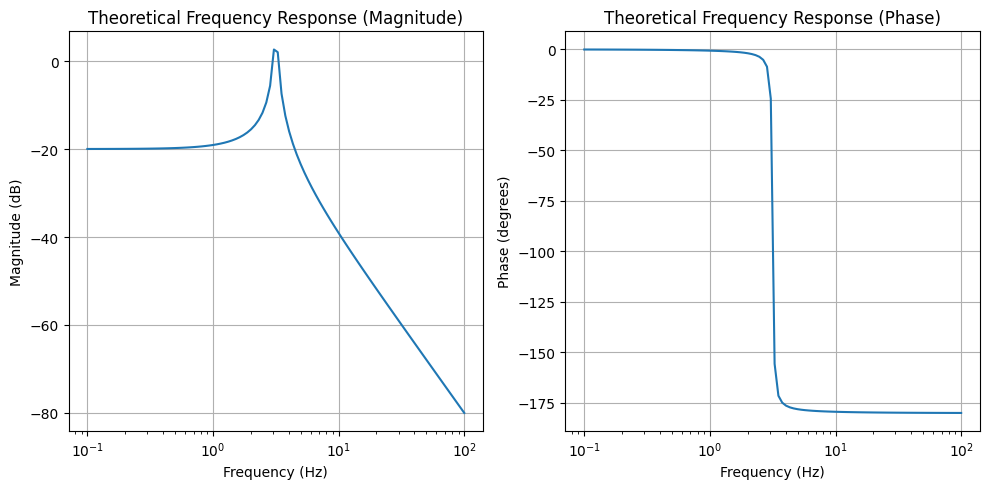

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the parameters of the system
mass = 1.0  # Mass of the system
stiffness = 10.0  # Stiffness of the spring
damping = 0.1  # Damping coefficient

# Create the transfer function of the system
numerator = [1.0]  # Transfer function numerator
denominator = [mass, damping, stiffness]  # Transfer function denominator

# Define the range of frequencies to evaluate the transfer function
frequencies = np.logspace(-1, 2, 100)  # Adjust the frequency range as needed

# Calculate the frequency response of the system
system = signal.TransferFunction(numerator, denominator)
_, response = signal.freqresp(system, frequencies)

# Calculate the magnitude and phase of the frequency response
magnitude = np.abs(response)
phase = np.angle(response, deg=True)

# Plot the magnitude and phase of the frequency response
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.semilogx(frequencies, 20 * np.log10(magnitude))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Theoretical Frequency Response (Magnitude)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogx(frequencies, phase)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.title('Theoretical Frequency Response (Phase)')
plt.grid(True)

plt.tight_layout()
plt.show()



#Week #2![download (2).png](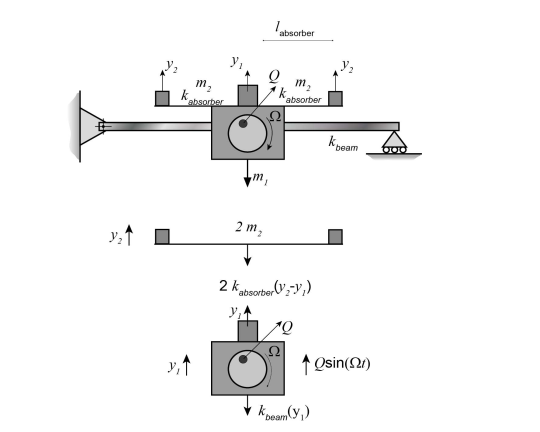![download (3).png](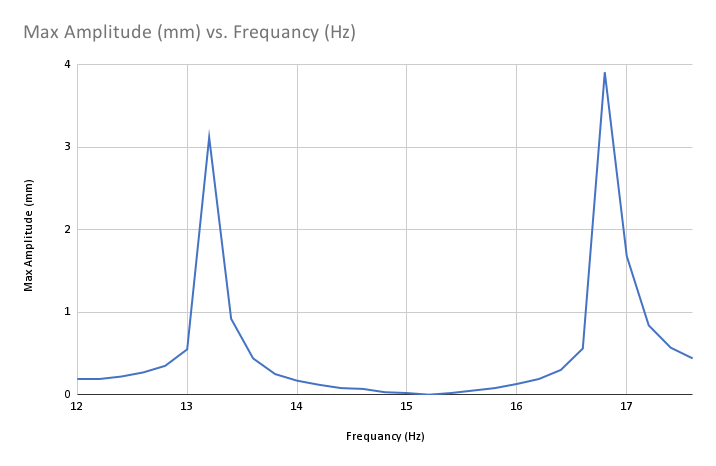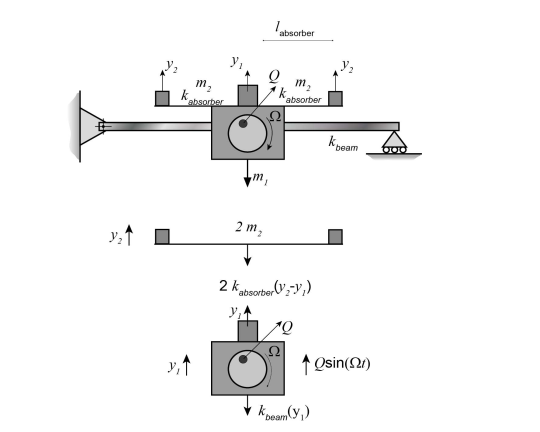))

##Activity #4





Plot the experimental frequency response of the system and find $\omega_d$ and $x_{ss_{max}}$ and compare it with your theoretical estimates and discuss the reasons for discrepancies if any.

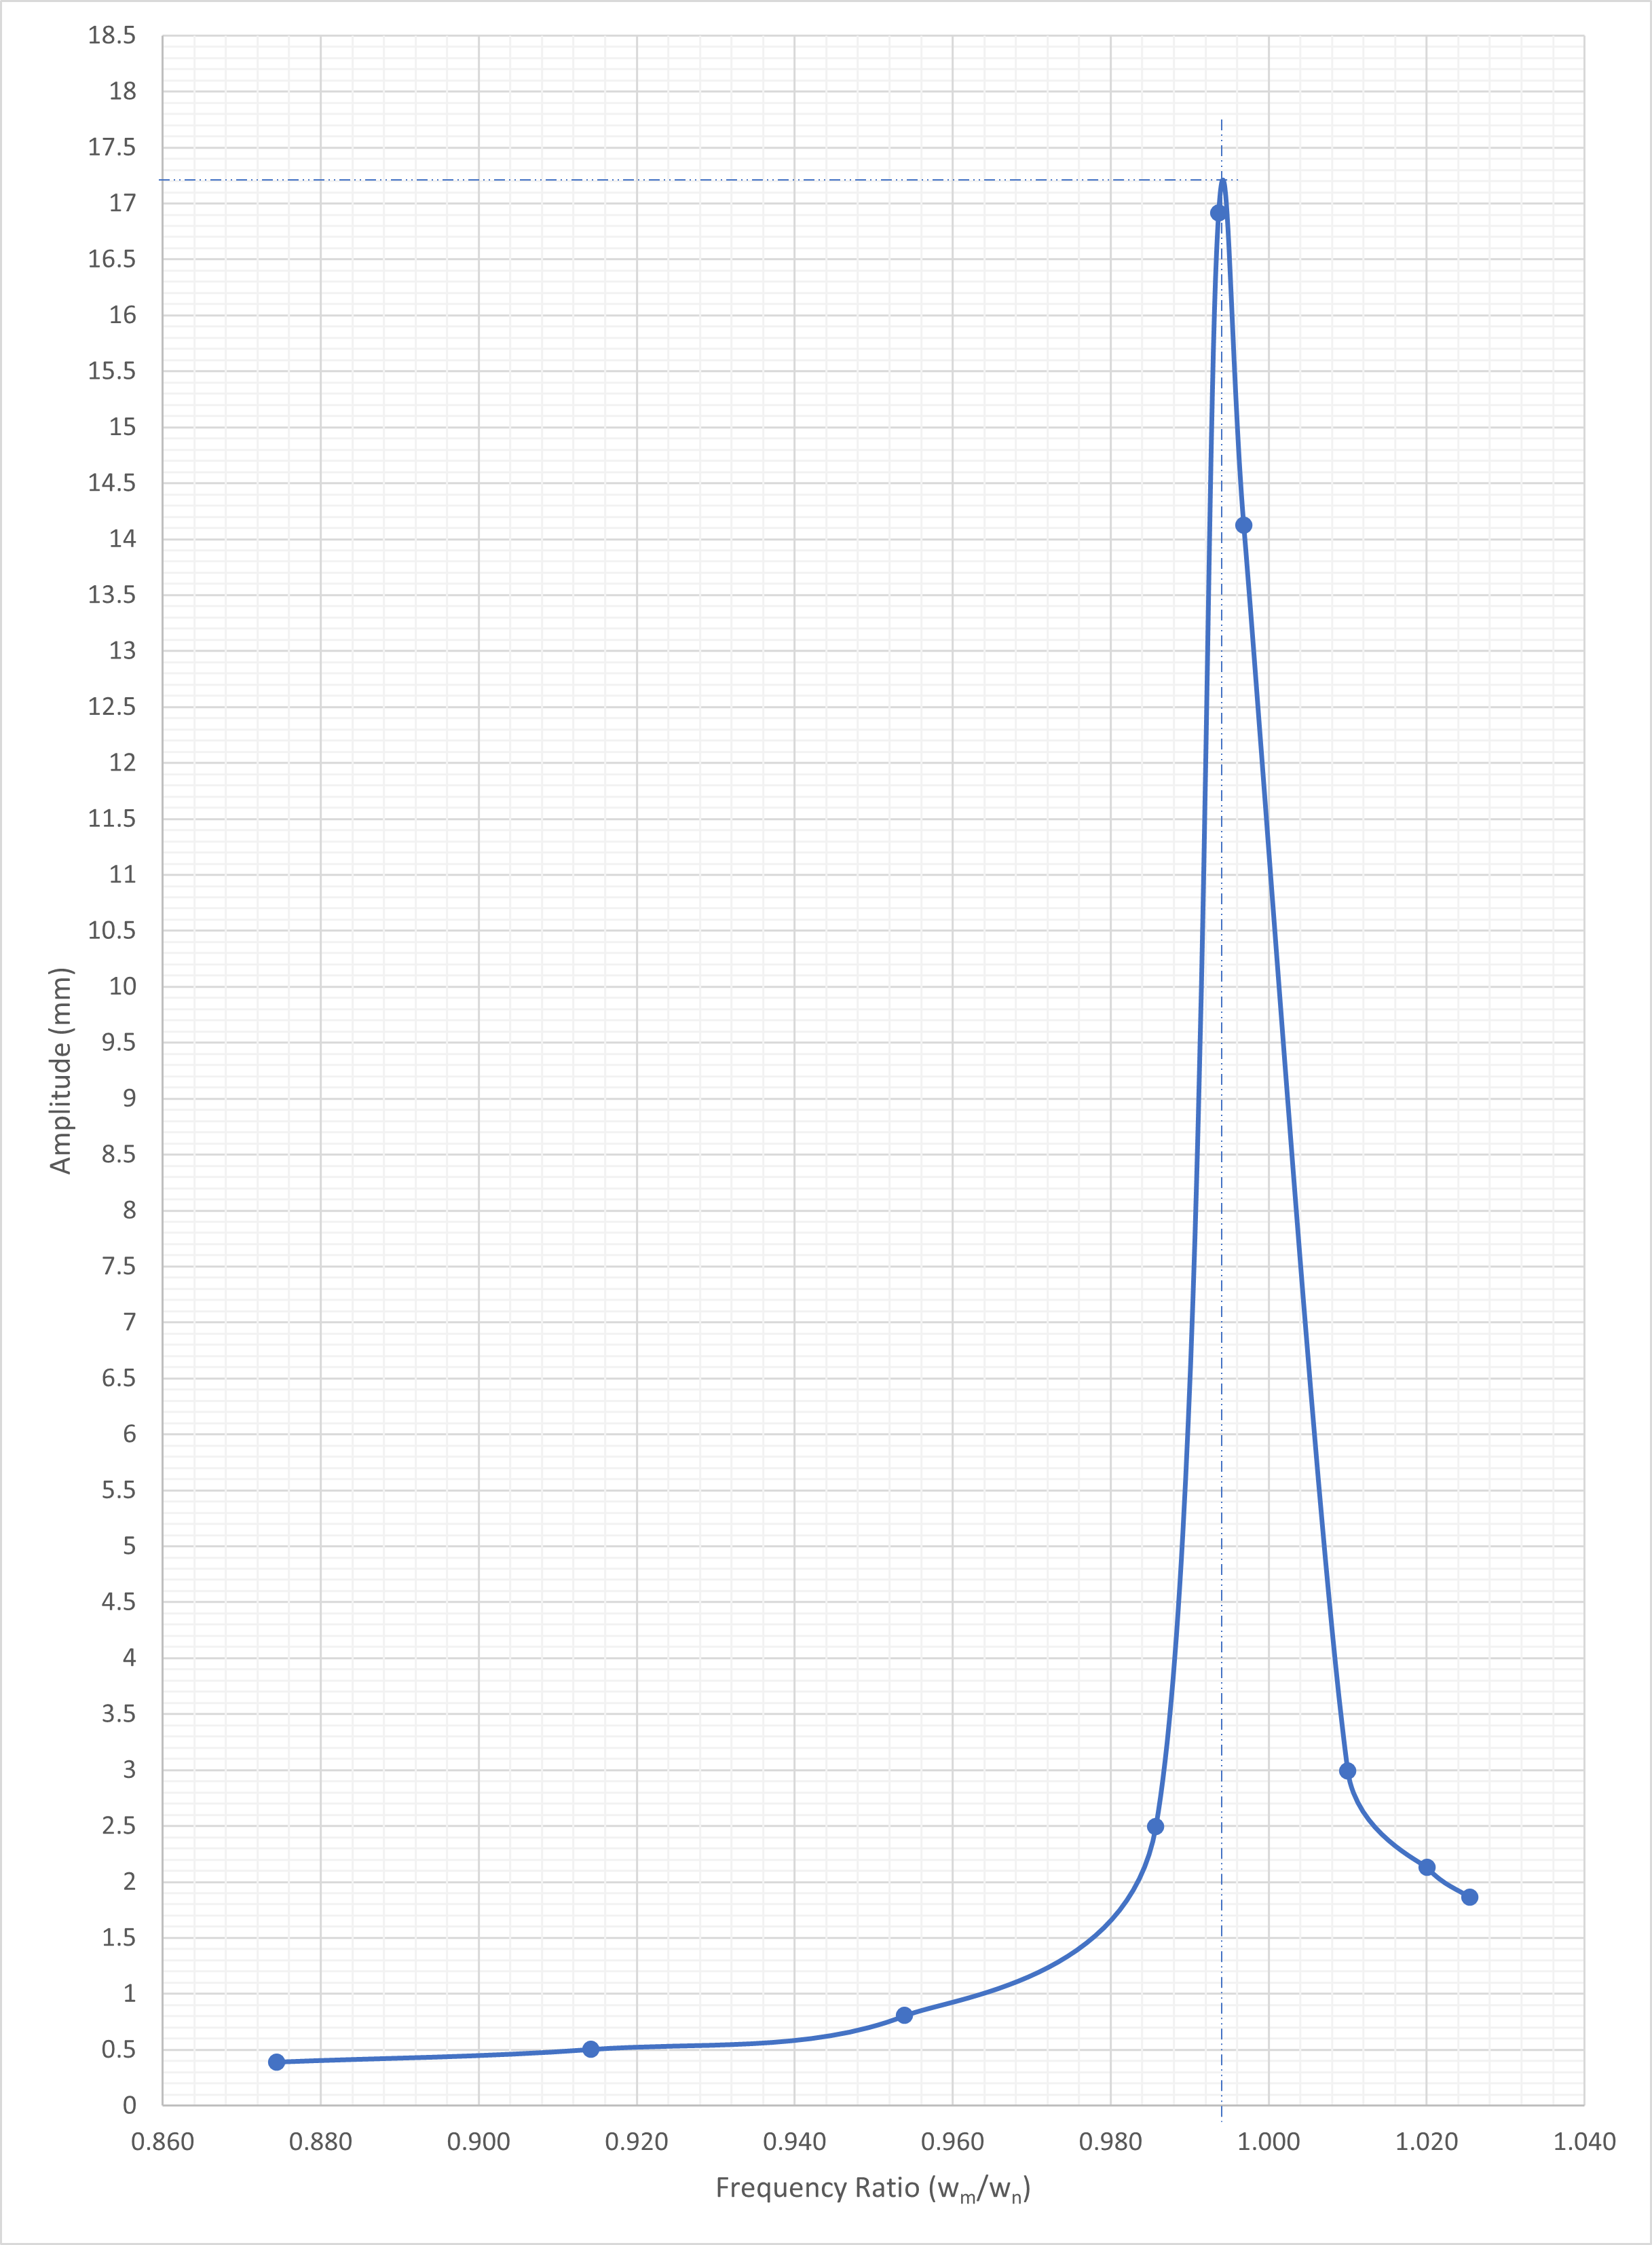

**Experimental**  $x_{ss,max}$ =17.2mm

In [12]:
import sympy
from sympy import symbols
l_b,k,z,M_b,M_s,M_f,M_m,l_d,l_m,l_s,m_u,r = symbols('l_b k z M_b M_s M_f M_m l_d l_m l_s m_u r')

I_A = (1/3)*M_b*l_b**2+M_m*l_m**2+((M_s/3)+M_f)*l_s**2

l_b = 0.815 #Beam length
k = 3800 #Spring constant
z = 0.4 #Damping ratio
M_b = 1.65 #Mass of the beam
M_s = 0.388 #Mass of the spring
M_f = 0.09 #Mass of the spring fixing
M_m = 4.2 #Total mass of the motor assembly

l_d = 0.2 #Distance from pinned end to the damper
l_m = l_b/2 #Distance from pinned end to the unbalanced motor
l_s = 0.75 #Distance from pinned end to the spring (Assumed)

m_u = 0.009 #Unbalanced mass
r = 0.035 #Offset from the motor axis to the unbalanced mass

I_A = (1/3)*M_b*l_b**2+M_m*l_m**2+((M_s/3)+M_f)*l_s**2
I_A
I_A = (1/3)*M_b*l_b**2+M_m*l_m**2+((M_s/3)+M_f)*l_s**2
I_A
from sympy import*
#init_printing(use_unicode=True)
a,w_m,w_n,c = symbols('\alpha \Omega \omega \zeta')
I_A



1.186135

In [13]:
w_n = float(sqrt((k*l_s**2)/I_A))
w_n #rad/s

42.45081193204783

In [14]:
d_r = 0.08 #Decay ratio obtained from the experimental data
c_ud = d_r/w_n #Damping ratio calculation
l_ds = 0.5 #distance to the displacement sensor

xss_max = (1000*((m_u*r*l_m/I_A)*l_ds)/(2*c_ud*sqrt(1-c_ud**2)))
xss_max

14.3562442902612

so the theoretical $x_{ss,max} = 14.35 \ mm$


Experimentel  $\omega_{d}$  =6.281 Hz
(Damped natural freqency is obtained from damped free vibration experim)

Theoretical $\omega_d$,

In [15]:
import math

amplitude_1 = 1.979
amplitude_2 = 1.807

damping_ratio = math.log(amplitude_1 / amplitude_2) / math.sqrt((2 * math.pi)**2 + (math.log(amplitude_1 / amplitude_2))**2)
damping_ratio

w_n_hz = w_n/6.28 #Hz
w_d_free = w_n_hz*sqrt(1-damping_ratio**2)
w_d_free

6.75897577266910

theoritical $w_d$ = 6.75 Hz
theoritical and experimental values are nearly the same

#Week #3

##Activity #5

Equation of motion for above assembly

\begin{align}
m_{1} \ddot{y_{1}} + (k_{beam}+2k_{absorber})y_{1} - 2k_{absorber}y_{2} &= Q \sin{\Omega t}---------- (1) \\
2m_{2}\ddot{y_{2}} - 2k_{absorber}y_{1} + 2k_{absorber})y_{2} &=0---------- (2)
\end{align}


Motion of $y_{1}$ and $y_{2}$ can be modeled as;

$y_{1} = A \sin(\omega t)$ and $\ddot{y_{1}} = A \omega^2 \sin(\omega t)$

$y_{2} = b \sin(\omega t)$ and $\ddot{y_{2}} = B \omega^2 \sin(\omega t)$

Bu substituting to $(1)$ and $(2)$,

\begin{align}
[(k_{beam}+2k_{absorber}-m_{1}\omega^2)A - 2k_{absorber}B]\sin(\omega t) &= Q \sin{\Omega t}---------- (3) \\
[-2k_{absorber}A + (2k_{absorber}- 2m_{2}\omega^2) B]\sin(\omega t) &=0---------- (4)
\end{align}

In matrix form;

\begin{align}
\begin{bmatrix}
k_{beam}+2k_{absorber}-m_{1}\omega^2 & - 2k_{absorber} \\
- 2k_{absorber} & 2k_{absorber}- 2m_{2}\omega^2
\end{bmatrix}
\begin{bmatrix}
A\sin(\omega t) \\
B\sin(\omega t)
\end{bmatrix} = \begin{bmatrix}
Q\sin(\Omega t) \\
0
\end{bmatrix}
\end{align}

Therefore;

\begin{align}
CY = F
\end{align}

Where;

\begin{equation} C = \begin{bmatrix}
k_{beam}+2k_{absorber}-m_{1}\omega^2 & - 2k_{absorber} \\
- 2k_{absorber} & 2k_{absorber}- 2m_{2}\omega^2
\end{bmatrix}
\end{equation}
\\
\begin{equation} Y = \begin{bmatrix}
A\sin(\omega t) \\
B\sin(\omega t)
\end{bmatrix} \end{equation}
\\
\begin{equation} F = \begin{bmatrix}
Q\sin(\Omega t) \\
0
\end{bmatrix} \end{equation}


For Natural frequency
\begin{equation}
\begin{vmatrix}
C
\end{vmatrix} = 0
\end{equation}

Therefore;

\begin{equation}
2m_{1}m_{2}\omega^4 + [2m_{1}k_{absorber}+2m_{2}(k_{beam}+2k_{absorber})]\omega^2 + 2k_{beam}k_{absorber} = 0
\end{equation}

Here;

\begin{equation}
\omega^2 = \frac{-b \ \pm \ \sqrt{b^2 - 4ac}}{2a}
\end{equation}

Where;

\begin{align}
a &=  2m_{1}m_{2} \\
\\
b &= 2m_{1}k_{absorber}+2m_{2}(k_{beam}+2k_{absorber}) \\
\\
c &= 2k_{beam}k_{absorber}
\end{align}
\
\
$Y$ can be solved by;
\begin{align}
Y = C^{-1}F = \frac{adj(C)}{det(C)} F
\end{align}
\
\begin{equation}\begin{bmatrix}
A\sin(\omega t) \\
B\sin(\omega t)
\end{bmatrix} = \frac{1}{det(c)} \begin{bmatrix}
2k_{absorber}- 2m_{2}\omega^2 &  2k_{absorber} \\
 2k_{absorber} &  k_{beam}+2k_{absorber}-m_{1}\omega^2
\end{bmatrix} \begin{bmatrix}
Q\sin(\Omega t) \\ 0
\end{bmatrix}
\end{equation}



Design a tuned mass vibration absorber for the system and justify your design using simulations.

In [1]:
from sympy import*

k_1,k_2,m_1,m_2,omega,Q = symbols('k_1 k_2 m_1 m_2 \omega Q')

C = Matrix([[k_2+2*k_1-m_1*omega**2,-2*k_1], [-2*k_1,2*k_1 - 2*m_2*omega**2]])
F = Matrix([[Q],[0]])
Y = C.inv()*F
Y
latex(Y)

'\\left[\\begin{matrix}\\frac{Q \\left(- \\omega^{2} m_{2} + k_{1}\\right)}{\\omega^{4} m_{1} m_{2} - \\omega^{2} k_{1} m_{1} - 2 \\omega^{2} k_{1} m_{2} - \\omega^{2} k_{2} m_{2} + k_{1} k_{2}}\\\\\\frac{Q k_{1}}{\\omega^{4} m_{1} m_{2} - \\omega^{2} k_{1} m_{1} - 2 \\omega^{2} k_{1} m_{2} - \\omega^{2} k_{2} m_{2} + k_{1} k_{2}}\\end{matrix}\\right]'

\begin{equation}\begin{bmatrix} A \\ B \end{bmatrix} = \begin{bmatrix}\frac{Q (- \omega^{2} m_{2} + k_{1})}{\omega^{4} m_{1} m_{2} - \omega^{2} k_{1} m_{1} - 2 \omega^{2} k_{1} m_{2} - \omega^{2} k_{2} m_{2} + k_{1} k_{2}}\\ \frac{Q k_{1}}{\omega^{4} m_{1} m_{2} - \omega^{2} k_{1} m_{1} - 2 \omega^{2} k_{1} m_{2} - \omega^{2} k_{2} m_{2} + k_{1} k_{2}}\end{bmatrix} \end{equation}
\
Here, $k_1 = k_{absorber}$ and $k_2 = k_{beam}$
\
\
The undamped vibration absorber is a special case where its job is to reduce amplitude $A$ to zero. If the value of $A$ is set to zero, then the frequency for the vibration absorber can be found.
\
\
\begin{equation}
\frac{Q (- \omega^{2} m_{2} + k_{1})}{\omega^{4} m_{1} m_{2} - \omega^{2} k_{1} m_{1} - 2 \omega^{2} k_{1} m_{2} - \omega^{2} k_{2} m_{2} + k_{1} k_{2}} = 0
\end{equation}
\
\begin{equation}
\omega = \sqrt{\frac{k_{1}}{m_{2}}}
\end{equation}

In [3]:
Y.subs(omega, sqrt(k_1/m_2))

Matrix([
[         0],
[-Q/(2*k_1)]])

Y.subs(omega, sqrt(k_1/m_2))

This is the natural frequency of the vibration absorber.
We can also calculate the expected amplitude of the vibration absorber $(B)$
\
\
\begin{equation}
B = \frac{Q k_{1}}{\omega^{4} m_{1} m_{2} - \omega^{2} k_{1} m_{1} - 2 \omega^{2} k_{1} m_{2} - \omega^{2} k_{2} m_{2} + k_{1} k_{2}}
\end{equation}
\
\begin{equation}
B = -\frac{Q }{2k_1} = -\frac{Q }{2k_{absorber}}
\end{equation}
Based on beam theory for a cantilever, the effective stiffness is given by,\
\begin{equation}k_2 = \frac{3EI_{absorber}}{l_{absorber}^3}\end{equation}
\
According to Rayleighs formula, the total value of
the mass (m2) on each cantilever of the vibration absorber is the sum of the applied mass and a portion
of the vibration absorber beam mass, so that:
\begin{equation}m_2 = m_{mass}+\frac{33}{140}m_{absorber-beam}\end{equation}

\begin{equation}m_1 = m_{exciter}+\frac{17}{35}m_{beam}+m_{absorber}
\end{equation}

Substituting,
$\omega^2 = \frac{3EI_{absorber}}{l_{absorber}^3m_2}$
\
Re-arranging,
\begin{equation}
l_{absorber} = (\frac{3EI_{absorber}}{\omega^2 m_2})^{\frac{1}{3}}
\end{equation}

(Ref: TM1016V User Guide, Pg 40-44)

Natural frequency of the original system (vibration
absorber masses are at innermost position) is given by,\
\begin{equation}\omega_n = \sqrt{\frac{k_{beam}}{m_{eff}}}\end{equation}
\
where,
\begin{equation}m_{eff}=m_{exciter}+\frac{17}{35}m_{beam}\end{equation}

(Ref: TM1016V User Guide, Pg 35)

In [ ]:
from sympy import*
import numpy as np

#Data
m__exciter = 4.2
m__beam = 1.65
m__abs = 0.438
m__mass = 0.121
m_absbeam = 0.126
m_abs = 0.438
k__beam = 4.74*10**4
E = 2*10**11
I__abs = 7.2179*10**(-12)


m1 = m__exciter+(17/35)*m__beam+m__abs
m2 = m__mass+(33/140)*m_absbeam
#Natural frequency of original system

m__eff = m__exciter+(17/35)*m__beam + m__abs
w__n = sqrt(k__beam/m__eff)
w__n/6.28 #Hz

In [6]:
l_abs = ((3*E*I__abs)/(m2*(2*np.pi*w__n/6.28)**2))**(1/3)
l_abs

0.148797093716214

In [7]:
k__abs = (3*E*I__abs)/l_abs**3

a = 2*m1*m2
b = -(2*m1*k__abs+2*m2*(k__beam+2*k__abs))
c = 2*k__beam*k__abs

w__n1 = sqrt((-b+sqrt(b**2 - 4*a*c))/(2*a))
w__n1/6.28
w__n1


105.010677808987

In [8]:
w__n2 = sqrt((-b-sqrt(b**2 - 4*a*c))/(2*a))
w__n2/6.28

13.2206309655870

#Week #4

##Activity #6

Experimentally verify your tuned mass vibration absorber design.

In [20]:
m1 = m__exciter+(17/35)*m__beam+m__abs
m2 = m__mass+(33/140)*m_absbeam

l_abs = ((3*E*I__abs)/(m2*(2*np.pi*w__n/6.28)**2))**(1/3)
l_abs
k__abs = (3*E*I__abs)/l_abs**3



In [21]:
a = 2*m1*m2
b = -(2*m1*k__abs+2*m2*(k__beam+2*k__abs))
c = 2*k__beam*k__abs

w__n1 = sqrt((-b+sqrt(b**2 - 4*a*c))/(2*a))
w__n2 = sqrt((-b-sqrt(b**2 - 4*a*c))/(2*a))

w__n1

w__n2


sqrt(-0.304981487449437*sqrt(-300641644.245479*E + (-5552.50370899697*E - 14286.36)**2) + 4357.07532303814 + 1693.41084023841*E)

In [22]:
f1 = w__n1/(2*np.pi)


f2 = w__n2/(2*np.pi)
f2
f1


0.159154943091895*sqrt(0.304981487449437*sqrt(-300641644.245479*E + (-5552.50370899697*E - 14286.36)**2) + 4357.07532303814 + 1693.41084023841*E)

In [18]:
f1


0.159154943091895*sqrt(0.304981487449437*sqrt(-300641644.245479*E + (-5552.50370899697*E - 14286.36)**2) + 4357.07532303814 + 1693.41084023841*E)

In [19]:
f2


0.159154943091895*sqrt(-0.304981487449437*sqrt(-300641644.245479*E + (-5552.50370899697*E - 14286.36)**2) + 4357.07532303814 + 1693.41084023841*E)

When the vibration absorber masses are placed precisely as calculated, the primary oscillation diminishes significantly at the matching frequency. At this point, the beams reach an antiresonant state, nearly eliminating the main oscillation, which occurs at 15.2 Hz.

However, when the vibration absorber mass is shifted to a distance of 148 mm from its innermost position, the system's natural frequencies change to 16.71 Hz and 13.21 Hz.